In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import matplotlib.pyplot as plt


Vamos a usar un dataset que tiene forma de tetera 3D

In [2]:
teapot = pd.read_csv("../../datasets/teapot.csv")

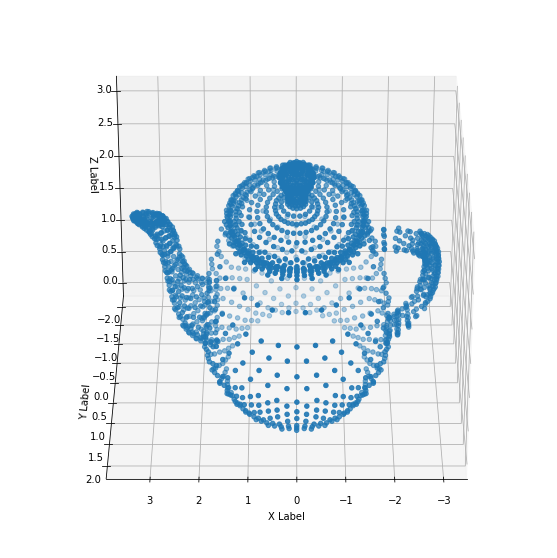

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(
    teapot.V1.values,
    teapot.V2.values,
    teapot.V3.values,
    marker='o',
    cmap=plt.cm.Spectral,
)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for i in range(90, 360, 10):
    ax.view_init(None, i)
    plt.show()


Ahora vamos a aplicarle PCA, pasando de 3 dimensiones a 2. ¿Cúales son las 2 dimensiones que contienen más información sobre la tetera? Si tuvieran que sacar una foto: desde donde sacarían la foto para asegurarse que todos sepan que es una tetera?

Para ellos usamos la herramienta PCA con 3 componentes y nos quedamos con los 2 primeros componentes.

In [4]:
pca = PCA(n_components=3)
projected = pca.fit_transform(teapot[["V1", "V2", "V3"]])

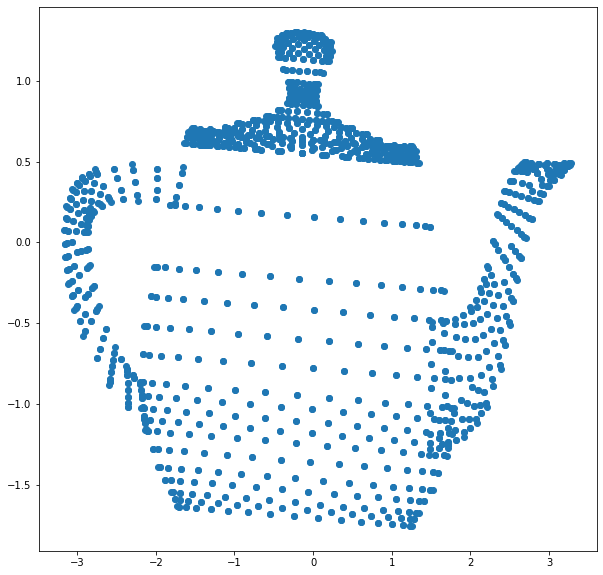

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(projected[:, 0], -projected[:, 1], 'o')

Es obvio que si vemos esta imágen sabemos que es una tetera, ¿no?. ¿Qué vemos en las dos dimensiones con menor cantidad de información? Para ello nos quedamos con las últimas dos dimensiones de la proyección.

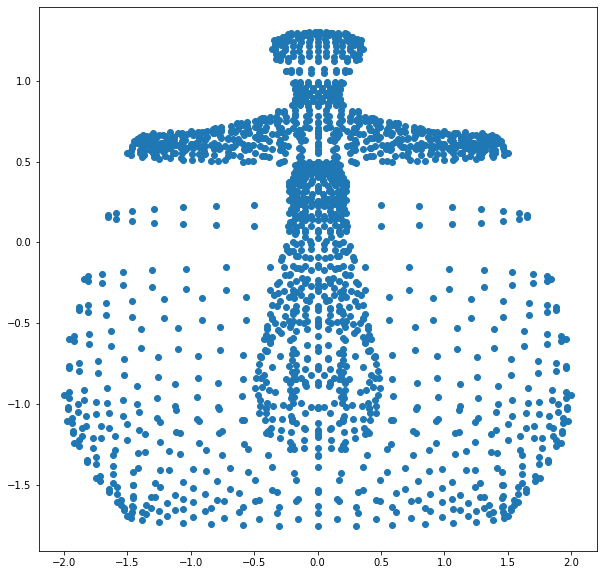

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(projected[:, 2], -projected[:, 1], 'o')

No es claro que si vemos esto reconocemos que es una tetera. Ahora aplicamos el método de reducción de dimensionalidad TSNE.

In [7]:
X_tsne = TSNE(n_components=2, perplexity=150).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

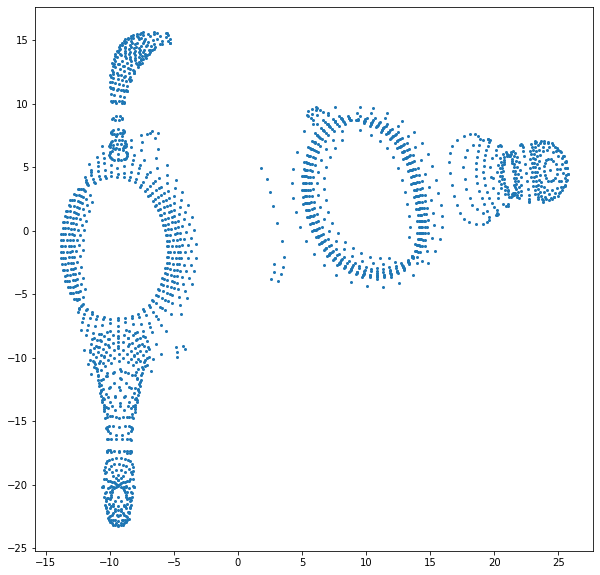

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(x1, x2, 'o', markersize=2)

Vemos que es como si hubiésemos separado la tetera en sus partes. ¿Qué pasa si disminuimos el valor de *perplexity*?

In [9]:
X_tsne = TSNE(n_components=2, perplexity=5).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

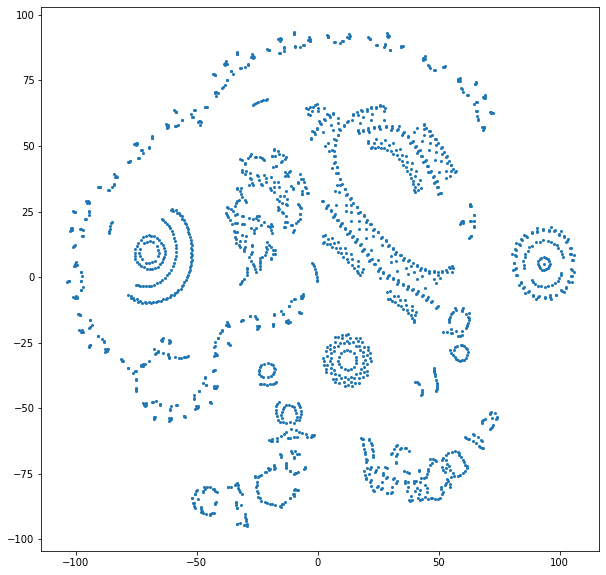

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(x1, x2, 'o', markersize=2)

Vemos que los conglomerados de puntos estan más separados entre sí y los puntos dentro de cada conglomerado están más cercanos. Es como si hubiésemos roto la tetera en muchos pedazos chicos. ¿Qué pasa si ahora aumentamos *perplexity*?

In [11]:
X_tsne = TSNE(n_components=2, perplexity=200).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]

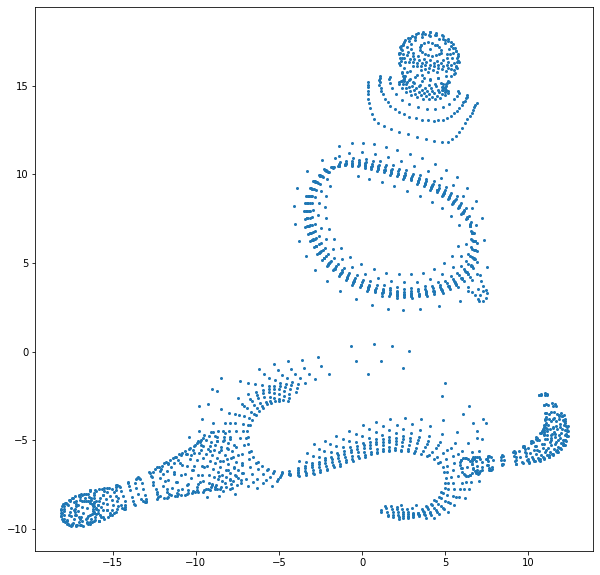

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(x1, x2, 'o', markersize=2)

Los conglomerados vemos que tienen más puntos, incluso en el caso extremo:

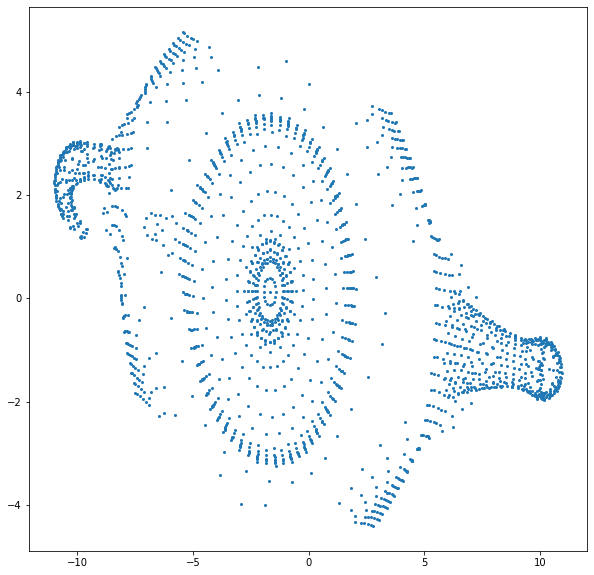

In [13]:
X_tsne = TSNE(n_components=2, perplexity=400).fit_transform(teapot[["V1", "V2", "V3"]])
x1 = X_tsne[:, 0]
x2 = X_tsne[:, 1]
plt.figure(figsize=(10, 10))
plt.plot(x1, x2, 'o', markersize=2)

Prácticamente hay solo 2 conglomerados distinguibles por el alto valor de *perplexity*. Por lo que queda claro que el valor de *perplexity* controla la noción de vecindad, para valores más altos de *perplexity* más puntos serán considerados vecinos cercanos.